In [19]:
#df = pd.read_csv(r'C:\Users\nages\Downloads\media_bi_test')

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#question 1
df = pd.read_csv(r'C:\Users\nages\Downloads\media_bi_test.csv')

In [22]:
df.head()

,company,country,platform,date,spend
0,Quantum Collective,United States,Platform A,2024-07-16T00:00,165.089083
1,Quantum Collective,United States,Platform A,2024-07-17T00:00,191.786875
2,Quantum Collective,United States,Platform A,2024-07-18T00:00,166.744909
3,Quantum Collective,United States,Platform A,2024-07-19T00:00,121.314549
4,Quantum Collective,United States,Platform A,2024-07-20T00:00,145.730626


In [23]:
# Check for missing values
df.isnull().sum()


company     16283
country         0
platform        0
date            0
spend           0
dtype: int64

In [24]:
df.shape

(243304, 5)

In [25]:
# Check for duplicates
df.duplicated().sum()

0

In [26]:
# Convert date to datetime type
df['date'] = pd.to_datetime(df['date'])
df.dtypes

company             object
country             object
platform            object
date        datetime64[ns]
spend              float64
dtype: object

In [51]:
# Create a full copy of the cleaned dataset
#df_cleaned = df.dropna(subset=['company']).copy()
# Replace all NA values with 0
df_cleaned = df.fillna('NotDefined')

# Now it's safe to add columns
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned['year'] = df_cleaned['date'].dt.year


In [52]:
df_cleaned.head(10)


,company,country,platform,date,spend,year_month,day_of_year,year
0,Quantum Collective,United States,Platform A,2024-07-16,165.089083,2024-07,198,2024
1,Quantum Collective,United States,Platform A,2024-07-17,191.786875,2024-07,199,2024
2,Quantum Collective,United States,Platform A,2024-07-18,166.744909,2024-07,200,2024
3,Quantum Collective,United States,Platform A,2024-07-19,121.314549,2024-07,201,2024
4,Quantum Collective,United States,Platform A,2024-07-20,145.730626,2024-07,202,2024
5,Quantum Collective,United States,Platform A,2024-07-21,132.475070,2024-07,203,2024
6,Quantum Collective,China,Platform A,2024-07-16,452.786651,2024-07,198,2024
7,Quantum Collective,China,Platform A,2024-07-17,345.653770,2024-07,199,2024
8,Quantum Collective,China,Platform A,2024-07-18,339.044151,2024-07,200,2024
9,Quantum Collective,China,Platform A,2024-07-19,506.047971,2024-07,201,2024


In [36]:
df_cleaned.columns

Index(['company', 'country', 'platform', 'date', 'spend', 'year'], dtype='object')

In [37]:
#question 2
# Total media spend per year
spend_by_year = df_cleaned.groupby('year')['spend'].sum().reset_index()
print(spend_by_year)


   year         spend
0  2023  5.696635e+06
1  2024  8.224486e+06


In [38]:
# Count unique companies per year
unique_customers_by_year = df_cleaned.groupby('year')['company'].nunique().reset_index(name='unique_customers')
print(unique_customers_by_year)


   year  unique_customers
0  2023                12
1  2024                16


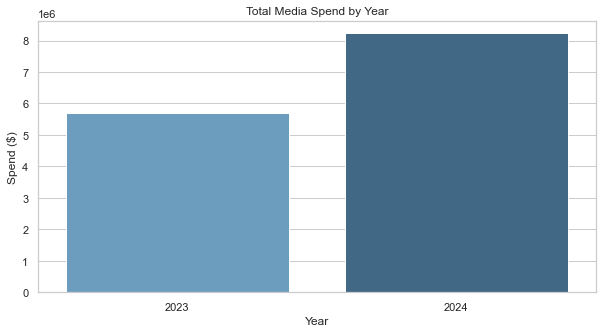

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot spend trend
plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='spend', data=spend_by_year, palette='Blues_d')
plt.title('Total Media Spend by Year')
plt.xlabel('Year')
plt.ylabel('Spend ($)')
plt.show()


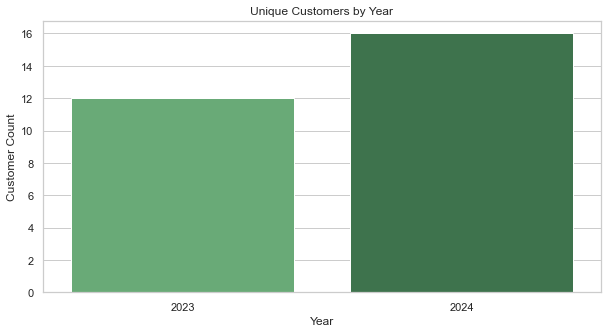

In [40]:
# Plot unique customers trend
plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='unique_customers', data=unique_customers_by_year, palette='Greens_d')
plt.title('Unique Customers by Year')
plt.xlabel('Year')
plt.ylabel('Customer Count')
plt.show()


In [41]:
#questionn 3
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M')

# Step 2: Idenify first and last seen month per customer
first_seen = df.groupby('company')['year_month'].min()
last_seen = df.groupby('company')['year_month'].max()

# Step 3: Unique customer appearances per month
monthly_customers = df[['company', 'year_month']].drop_duplicates()

# Total customers active each month
total_customers = monthly_customers.groupby('year_month')['company'].nunique().rename('total_customers')

# New customers (first time seen in this month)
new_customers = monthly_customers[monthly_customers['year_month'] == monthly_customers['company'].map(first_seen)]
new_customers_count = new_customers.groupby('year_month')['company'].nunique().rename('new_customers')

# Churned customers (last time seen in this month)
churned_customers = monthly_customers[monthly_customers['year_month'] == monthly_customers['company'].map(last_seen)]
churned_customers_count = churned_customers.groupby('year_month')['company'].nunique().rename('churned_customers')

# Step 4: Combine all into one summary table
customer_summary = pd.concat([total_customers, new_customers_count, churned_customers_count], axis=1).fillna(0).astype(int)

# View the result
print(customer_summary)


            total_customers  new_customers  churned_customers
year_month                                                   
2023-01                   6              6                  0
2023-02                   7              1                  0
2023-03                   7              0                  0
2023-04                   9              2                  0
2023-05                  11              2                  0
2023-06                  11              0                  0
2023-07                  11              0                  0
2023-08                  12              1                  0
2023-09                  12              0                  1
2023-10                  11              0                  0
2023-11                  11              0                  0
2023-12                  11              0                  2
2024-01                  10              1                  0
2024-02                  11              1                  0
2024-03 

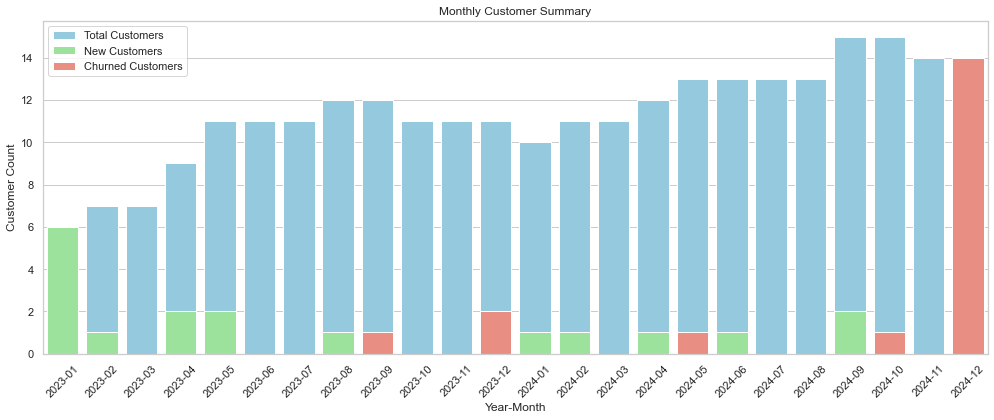

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index to use 'year_month' as a column
customer_summary_plot = customer_summary.reset_index()
customer_summary_plot['year_month'] = customer_summary_plot['year_month'].astype(str)

# Set style
sns.set(style="whitegrid")

# Create a bar plot for each metric
plt.figure(figsize=(14, 6))
sns.barplot(x='year_month', y='total_customers', data=customer_summary_plot, color='skyblue', label='Total Customers')
sns.barplot(x='year_month', y='new_customers', data=customer_summary_plot, color='lightgreen', label='New Customers')
sns.barplot(x='year_month', y='churned_customers', data=customer_summary_plot, color='salmon', label='Churned Customers')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Labels and title
plt.title('Monthly Customer Summary')
plt.xlabel('Year-Month')
plt.ylabel('Customer Count')
plt.legend()
plt.tight_layout()
plt.show()


In [44]:
#4th question
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['day_of_year'] = df['date'].dt.dayofyear

# Group by year and day of year to compute daily spend
daily_spend = df.groupby(['year', 'day_of_year'])['spend'].sum().reset_index()

# Compute cumulative spend for each year
daily_spend['cumulative_spend'] = daily_spend.groupby('year')['spend'].cumsum()

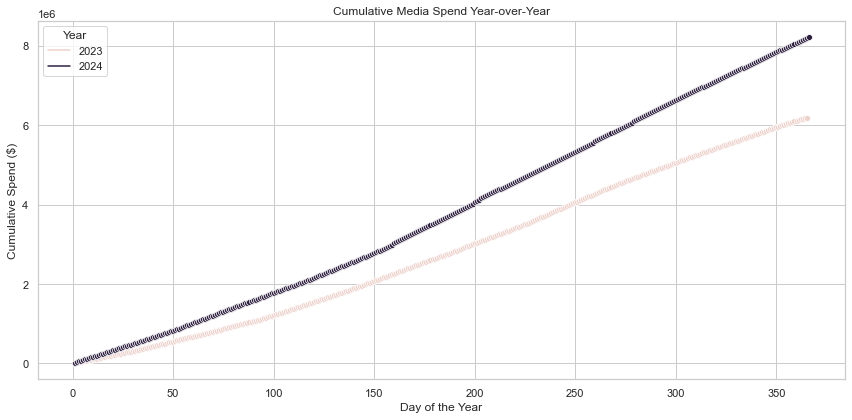

In [45]:
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_spend, x='day_of_year', y='cumulative_spend', hue='year', marker='o')

# Aesthetics
plt.title('Cumulative Media Spend Year-over-Year')
plt.xlabel('Day of the Year')
plt.ylabel('Cumulative Spend ($)')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
#question 5
# Total spend per platform
platform_spend = df.groupby('platform')['spend'].sum().reset_index().sort_values(by='spend', ascending=False)

# Display data
print(platform_spend)

     platform         spend
0  Platform A  7.100985e+06
1  Platform B  5.005689e+06
2  Platform C  1.805937e+06
3  Platform D  5.083690e+05


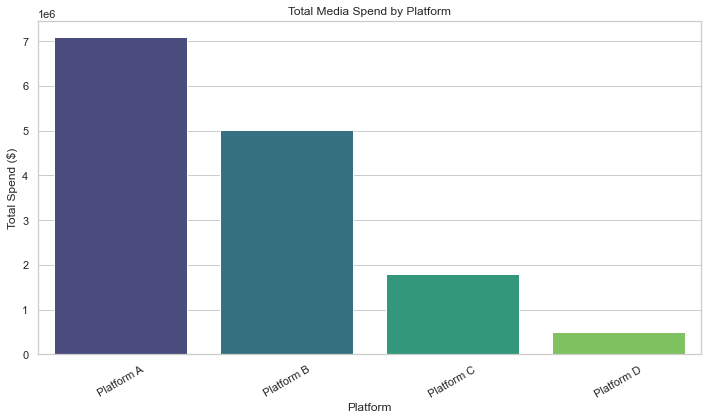

In [47]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=platform_spend, x='platform', y='spend', palette='viridis')
plt.title('Total Media Spend by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Spend ($)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [49]:
#question 6- ML
# Monthly spend
df['year_month'] = df['date'].dt.to_period('M')
monthly_spend = df.groupby('year_month')['spend'].sum().reset_index()
monthly_spend['year_month'] = monthly_spend['year_month'].astype(str)


In [50]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert month to a number for regression
monthly_spend['month_num'] = np.arange(len(monthly_spend))

# Train a simple linear model
X = monthly_spend[['month_num']]
y = monthly_spend['spend']
model = LinearRegression().fit(X, y)

# Predict next 3 months
future_months = pd.DataFrame({'month_num': np.arange(len(monthly_spend), len(monthly_spend)+3)})
future_spend = model.predict(future_months)

# Estimate revenue with 10% fee rate
fee_rate = 0.10
future_revenue = future_spend * fee_rate

# Combine into a table
forecast = pd.DataFrame({
    'future_month': pd.date_range(start=monthly_spend['year_month'].iloc[-1] + "-01", periods=3, freq='MS').strftime('%Y-%m'),
    'predicted_spend': future_spend,
    'estimated_revenue': future_revenue
})

print(forecast)


  future_month  predicted_spend  estimated_revenue
0      2024-12    808816.209544       80881.620954
1      2025-01    825451.576844       82545.157684
2      2025-02    842086.944144       84208.694414
